### <b>[RQ2]</b> Let's explore the dataset by finding simple insights regarding the profile and posts.

* **Missing values**
Before starting answering the questions, we perform some data cleaning tasks that will make our analysis less prompt to errors.

* Let's remove the columns that are not useful for our purposes:
  * `description` has 2055996 missing values
  * `url` has 3639312 missing values
* Replace `is_business_account missing` rows with `False` values
* Finally, let's remove the remaining rows with missing values

In [21]:
df_instagram_profiles.shape[0] # no. rows = 4,509,586
df_instagram_profiles.isna().sum() 

sid                          0
profile_id               32447
profile_name                 0
firstname_lastname      288465
description            2055996
following              1056815
followers              1056815
n_posts                1056815
url                    3639312
cts                     438488
is_business_account    1064263
dtype: int64

In [4]:
df_instagram_profiles_RQ2 = df_instagram_profiles.drop(['description', 'url'], axis = 1)
df_instagram_profiles_RQ2.is_business_account.fillna(False, inplace = True)
df_instagram_profiles_RQ2.dropna(axis = 0, how = 'any', inplace = True)
df_instagram_profiles_RQ2.shape[0] # no. rows = 3,130,712

Up to this point, we have removed 1,378.874 rows and 2 columns, obtaining as an output a more consistent dataset.

<b>2.1</b> Plot the number of posts for each profile in descending order

In [27]:
df_instagram_profiles_RQ2.sort_values(by = 'n_posts', ascending = False, inplace = True)
df_instagram_profiles_RQ2.n_posts = df_instagram_profiles_RQ2.n_posts.astype(int)
df_instagram_profiles_RQ2.n_posts

3990313    183730
2571453    142428
4338921    126340
3942129    125220
4219642    117262
            ...  
1786774         0
1711929         0
1446235         0
1446228         0
3719054         0
Name: n_posts, Length: 3130712, dtype: int64

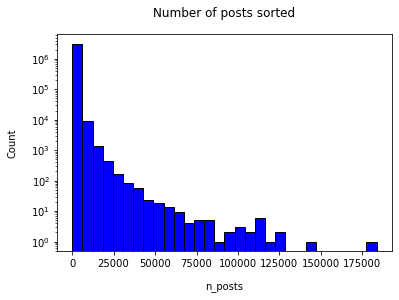

In [28]:
hist(df_instagram_profiles_RQ2['n_posts'], "n_posts", "Number of posts sorted", "blue", n_bins = 30, log_trans = True)

<b>2.2</b> What posts have the highest number of "likes"?

* We import the `instagram_posts.csv` dataset (only the columns that we need for this excercise) and, as with profiles.csv, we perform some data cleaning: we remove NaN values and make likes and comments type int, instead of float.

In [31]:
fields = ["numbr_likes", "number_comments"]
df_instagram_posts_RQ2_1 = pd.read_csv("~/instagram_posts.csv", delimiter = "\t", usecols = fields)
df_instagram_posts_RQ2_1.shape[0] # no. of rows = 42,710,197
df_instagram_posts_RQ2_1.isna().sum()

numbr_likes        36
number_comments    36
dtype: int64

In [33]:
# delete the NaN values
df_instagram_posts_RQ2_1.dropna(axis = 0, how = 'any', inplace = True)
# transform float to integer number
df_instagram_posts_RQ2_1 = df_instagram_posts_RQ2_1.astype({'numbr_likes': 'int', 'number_comments': 'int'}, errors = 'ignore')

* `most_likes` is obtained by sorting in **descending order** `df_instagram_posts_RQ2_1` according to the `numbr_likes` and then taking the first 10 posts (`.head(10)`) with the most likes.

In [35]:
most_likes = df_instagram_posts_RQ2_1.sort_values(by = 'numbr_likes', ascending = False).head(10)
most_likes

,numbr_likes,number_comments
19624085,8822952,165886
19623988,5447066,25303
19624082,5116398,40608
19623986,4271466,30770
39701024,4264745,18691
6293907,3586546,15405
19624086,3558599,15715
19802016,3533326,59475
30850564,3340297,149489
39812576,3311246,64318


<b>2.3</b> What posts have the most and the least number of comments?

* `most_comments` is obtained by sorting in **descending order** `df_instagram_posts_RQ2_1` according to the `number_comments` and then taking the first 10 posts (`.head(10)`) with the most comments.

In [36]:
most_comments = df_instagram_posts_RQ2_1.sort_values(by = 'number_comments', ascending = False).head(10)
most_comments 

,numbr_likes,number_comments
41873060,38871,488953
12164781,81523,313997
33261751,54507,257488
11149127,331703,214365
9383817,23515,189888
5427268,129258,180635
25257169,684861,173988
6220011,2224495,170836
31689573,226336,166919
14257307,169791,166198


* `least_comments` is obtained by sorting in **ascending order** `df_instagram_posts_RQ2_1` according to the `number_comments` and then taking the first 10 posts (`.head(10)`) with the least comments.

In [15]:
least_comments = df_instagram_posts_RQ2_1.sort_values(by = 'number_comments', ascending = True).head(10)
least_comments

,post_id,numbr_likes,number_comments
0,BXdjjUlgcgq,80,0
709,Bx-2z8Hhk1j,29,0
289,Bxr-ibHps7V,25,0
712,Bx5mknNBLCG,35,0
713,Bx3TT5TB3Tu,188,0
286,Bxztf_xlzLh,15,0
714,Bx0fZxkh-_4,134,0
284,Bx65tHPJH2S,18,0
283,ByA02DAl8SZ,19,0
282,ByCqFD-ASgn,9,0


<b>2.4</b> How many posts include tagged locations, and how many do not? Show it using an appropriate chart and comment your results.

* We import the `instagram_posts.csv` dataset (only the columns that we need for this excercise)

In [2]:
fields = ["post_id", "location_id"]
df_instagram_posts_RQ2_3 = pd.read_csv("~/instagram_posts.csv", delimiter = "\t", usecols = fields)

In [23]:
# includes tagged locations means location_name not Nan
count_tagged_location = df_instagram_posts_RQ2_3.loc[df_instagram_posts_RQ2_3['location_id'].notna()].shape[0] # 29,737,425
count_no_tagged_location = len(df_instagram_posts_RQ2_3) - count_tagged_location # 12,972,772

print("The number of posts     containing tagged locations is:", count_tagged_location)
print("The number of posts not containing tagged locations is:", count_no_tagged_location)

The number of posts     containing tagged locations is: 29737425
The number of posts not containing tagged locations is: 12972772


Text(0.5, 1.05, 'Count of tagged & no-tagged locations')

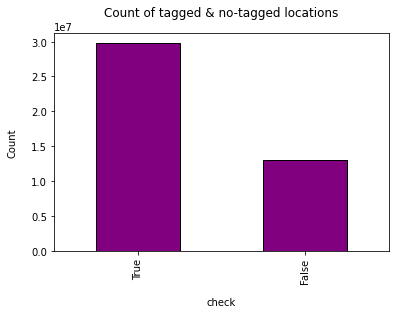

In [112]:
# plot
df_instagram_posts_RQ2_3['check'] = np.where(df_instagram_posts_RQ2_3['location_id'].notna(), True, False)
check = df_instagram_posts_RQ2_3['check']
count = check.value_counts()
count.plot(kind = 'bar', color = 'purple', ec = 'black')
plt.xlabel("check", labelpad = 14)
plt.ylabel("Count", labelpad = 14)
plt.title("Count of tagged & no-tagged locations", y = 1.05)

As it can be observed in the chart, almost 70% of the locations are tagged by users while 30% aren't. This could be interpreted, in the sense that, **most people post pictures on instagram when they are in a place where they want to be seen**, so it is more likely that the user wants its followers to know the location.

##### 2.5 How many posts include only photos? How many also have videos?

* We import the `instagram_posts.csv` dataset (only the columns that we need for this excercise)

In [2]:
fields = ["post_id", "post_type"]
df_instagram_posts_RQ2_2 = pd.read_csv("~/instagram_posts.csv", delimiter = "\t", usecols = fields)

In [141]:
# l1: list containing only post_type == 1 (only photos)
l1 = [1]
print("The number of posts that include only photos is", df_instagram_posts_RQ2_2.loc[df_instagram_posts_RQ2_2['post_type'].isin(l1)].shape[0]) # 41,534,486

The number of posts that include only photos is 41534486


In [143]:
# l1: list containing only post_type == 3 (photos and video)
l2 = [3]
print("The number of posts that include both photos and videos is", df_instagram_posts_RQ2_2.loc[df_instagram_posts_RQ2_2['post_type'].isin(l2)].shape[0]) # 40,943

The number of posts that include both photos and videos is 40943


##### f) What's the percentage of business accounts vs non-business? What can you interpret regarding that percentage?

* **Note**: the missing values of the `is_business_account` variable were substituted with `False`. So, the percentages may be different by just eliminating the missing values for that column.

In [138]:
# Percentage of business accounts & non-business accounts

count_business_accounts = df_instagram_profiles.loc[df_instagram_profiles['is_business_account'] == True].shape[0]
percentage_business_accounts = count_business_accounts/len(df_instagram_profiles)

a = "Percentage of business accounts: " + '{0:.2%}'.format(percentage_business_accounts)
b = "Percentage of non-business accounts: " + '{0:.2%}'.format(1 - percentage_business_accounts)

print(os.linesep.join([a, b])) # 18.97%

Percentage of business accounts: 18.97%
Percentage of non-business accounts: 81.03%


This significant difference between the number of business and non-business accounts could be interpreted from a social perspective: even though instagram is one of the most attractive markets for all kind of brands, at its core is mainly used by regular people that want to interact with their friends and make new ones.

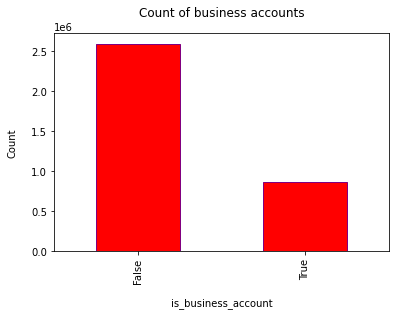

In [77]:
# plot of percentage of business & non-business accounts
bar_binary(df_instagram_profiles['is_business_account'], "is_business_account", "Count of business accounts", "red")

### <b>[RQ2]</b> Now it's important to understand the most common times in which users publish their posts

##### 3.1 What is the most common time in which users publish their posts?

* Let's import the `instagram_posts.csv` dataset (only the columns that we need for this excercise)

In [2]:
fields = ["profile_id", "cts"]
df_instagram_posts_RQ3 = pd.read_csv("~/instagram_posts.csv", delimiter = "\t", usecols = fields)

In [3]:
# For workability reasons, we need to divide dataset into chunks of 5,000,000 rows.
chunk_list = []
for i in range(0, len(df_instagram_posts_RQ3), 5000000):
    chunk = df_instagram_posts_RQ3[i:i+5000000]
    chunk_list.append(chunk)

* Then we convert the `cts` column from object type to `datetime`. Then we create two new columns:
  * `cts_time`: in the format `hh:mm:ss`. For instance, `20:00:00`
  * `hour`: in the format `hh`. For instance, `20`<br>
  Finally we append the chunks to a new list named `chunk_list_new`.

In [4]:
# Convert string (object type) to datetime
# Then, get only time from cts (we are not interested in the dates but only in the time)
chunk_list_new = []
for chunk in chunk_list:
    chunk_copy = chunk.copy()
    chunk_copy['cts_time'] = pd.to_datetime(chunk['cts']).dt.time
    chunk_copy['hour'] = pd.to_datetime(chunk['cts']).dt.hour
    chunk_list_new.append(chunk_copy)

* We group by `cts_time` and `hour` by chunks and obtain two new lists `chunk_list_new1` and `chunk_list_new2`.

In [40]:
# Group by cts_time

chunk_list_new1 = []
for chunk in chunk_list_new:
    chunk  = chunk.groupby('cts_time').size().reset_index(name='counts')
    chunk_list_new1.append(chunk)

In [42]:
# Group by hour

chunk_list_new2 = []
for chunk in chunk_list_new:
    chunk  = chunk.groupby('hour').size().reset_index(name='counts')
    chunk_list_new2.append(chunk)

* We concatenate the chunks and obtain two dataframes `data` and `data2`.
  * `data` contains `cts_time`.
  * `data2` contains `hour`.

In [43]:
# Concatenate chunks, group by cts_time (and hour) and add up counts

data  = pd.concat(chunk_list_new1).groupby(['cts_time']).sum().reset_index()
data2 = pd.concat(chunk_list_new2).groupby(['hour']).sum().reset_index()
data2.hour = data2.hour.astype(int)

##### The most common time(s) in which users publish their posts is 21:00:09. People post 47.5% more at this time that other times.

In [44]:
count = data.counts.value_counts(ascending = True).values[0]
data.sort_values(by = 'counts', ascending = False).head(count) # 21:00:09

,cts_time,counts
75609,21:00:09,928


In [21]:
print("The average number of times each cts_time is present in the dataset:", int(np.mean(data.counts)))
print("The median  number of times each cts_time is present in the dataset:", int(np.median(data.counts))) 
print("The maximum number of times each cts_time is present in the dataset:", int(np.max(data.counts)))
print("The minimum number of times each cts_time is present in the dataset:", int(np.min(data.counts)))

The average number of times each cts_time is present in the dataset: 487
The median  number of times each cts_time is present in the dataset: 494
The maximum number of times each cts_time is present in the dataset: 928
The minimum number of times each cts_time is present in the dataset: 223


##### The most common hour(s) in which users publish their posts

In [45]:
count2 = data2.counts.value_counts(ascending = True).values[0]
data2.sort_values(by = 'counts', ascending = False).head(count2) # 21:00:09

,hour,counts
19,19,2499758


In [25]:
print("The average number of times each hour is present in the dataset:", int(np.mean(data2.counts)))
print("The median  number of times each hour is present in the dataset:", int(np.median(data2.counts))) 
print("The maximum number of times each hour is present in the dataset:", int(np.max(data2.counts)))
print("The minimum number of times each hour is present in the dataset:", int(np.min(data2.counts)))
print("People post 29% more in the time slot (19:00-19:59) wrt the other time slots")

The average number of times each hour is present in the dataset: 1779452
The median  number of times each hour is present in the dataset: 1779408
The maximum number of times each hour is present in the dataset: 2499758
The minimum number of times each hour is present in the dataset: 1011923
People post 29% more in the time slot (19:00-19:59) wrt the other time slots


##### 3.2 Create a function that receives a time intervals list as a parameter and returns a plot with the number of posts for each given interval.

In [18]:
def time_intervals(data, time, time_intervals_list, title):
    
    time_results = {}
    for slot in time_intervals_list:
        result = len(data[(time >= slot[0]) &
                                  (time < slot[1])])
        time_results[str(slot)] = result
    
    plt.bar(list(time_results.keys()), time_results.values(), color = 'blue', ec = 'black', width = 0.8)
    plt.xlabel("time slots", labelpad = 14)
    plt.ylabel("Count", labelpad = 14)
    plt.title(title, y = 1.05)
    plt.show() 

##### 3.3 Use the function that you created in the previous literal to plot the number of posts between the following time intervals.

In [5]:
slots = [(6, 10), (11, 13), (14, 16), (17, 19), (20, 23), (0, 2), (3, 5)]

In [7]:
# concatenate the chunks

data2 = pd.concat(chunk_list_new)

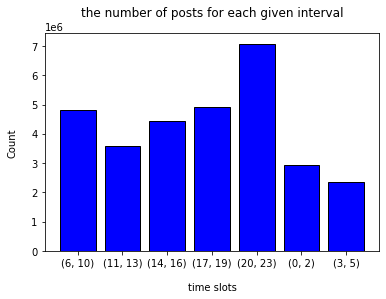

In [19]:
time_intervals(data2, data2.hour, slots, title = "the number of posts for each given interval")